In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from datetime import datetime
import warnings
import sys
import os

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo - Data analyt - Febrero 2024/Ejercicios plataforma/3 MODULO/marketing_campaign.csv', sep='\t')

In [4]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.shape

(2240, 29)

In [7]:
df['Age'] = datetime.now().year - df['Year_Birth']

In [8]:
def get_different_year():
    registration_year = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.now().year
    return current_year - registration_year

df['Years_Since_Registration'] = get_different_year()

In [9]:
df.isna().sum()

ID                           0
Year_Birth                   0
Education                    0
Marital_Status               0
Income                      24
Kidhome                      0
Teenhome                     0
Dt_Customer                  0
Recency                      0
MntWines                     0
MntFruits                    0
MntMeatProducts              0
MntFishProducts              0
MntSweetProducts             0
MntGoldProds                 0
NumDealsPurchases            0
NumWebPurchases              0
NumCatalogPurchases          0
NumStorePurchases            0
NumWebVisitsMonth            0
AcceptedCmp3                 0
AcceptedCmp4                 0
AcceptedCmp5                 0
AcceptedCmp1                 0
AcceptedCmp2                 0
Complain                     0
Z_CostContact                0
Z_Revenue                    0
Response                     0
Age                          0
Years_Since_Registration     0
dtype: int64

In [10]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Years_Since_Registration
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,67,12
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,70,10
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,59,11
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,40,10
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,43,10
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,0,3,11,0,57,11
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,0,3,11,0,53,12
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,0,3,11,0,39,11
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,0,3,11,1,50,11
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,0,0,0,3,11,0,74,10


In [11]:
df.dropna(inplace=True)

In [12]:
df.drop(['Year_Birth', 'ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education                 2216 non-null   object 
 1   Marital_Status            2216 non-null   object 
 2   Income                    2216 non-null   float64
 3   Kidhome                   2216 non-null   int64  
 4   Teenhome                  2216 non-null   int64  
 5   Recency                   2216 non-null   int64  
 6   MntWines                  2216 non-null   int64  
 7   MntFruits                 2216 non-null   int64  
 8   MntMeatProducts           2216 non-null   int64  
 9   MntFishProducts           2216 non-null   int64  
 10  MntSweetProducts          2216 non-null   int64  
 11  MntGoldProds              2216 non-null   int64  
 12  NumDealsPurchases         2216 non-null   int64  
 13  NumWebPurchases           2216 non-null   int64  
 14  NumCatalogPur

array([[<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>,
        <Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'Recency'}>,
        <Axes: title={'center': 'MntWines'}>],
       [<Axes: title={'center': 'MntFruits'}>,
        <Axes: title={'center': 'MntMeatProducts'}>,
        <Axes: title={'center': 'MntFishProducts'}>,
        <Axes: title={'center': 'MntSweetProducts'}>,
        <Axes: title={'center': 'MntGoldProds'}>],
       [<Axes: title={'center': 'NumDealsPurchases'}>,
        <Axes: title={'center': 'NumWebPurchases'}>,
        <Axes: title={'center': 'NumCatalogPurchases'}>,
        <Axes: title={'center': 'NumStorePurchases'}>,
        <Axes: title={'center': 'NumWebVisitsMonth'}>],
       [<Axes: title={'center': 'AcceptedCmp3'}>,
        <Axes: title={'center': 'AcceptedCmp4'}>,
        <Axes: title={'center': 'AcceptedCmp5'}>,
        <Axes: title={'center': 'AcceptedCmp1'}>,
        <Axes: title={'center': 'Accept

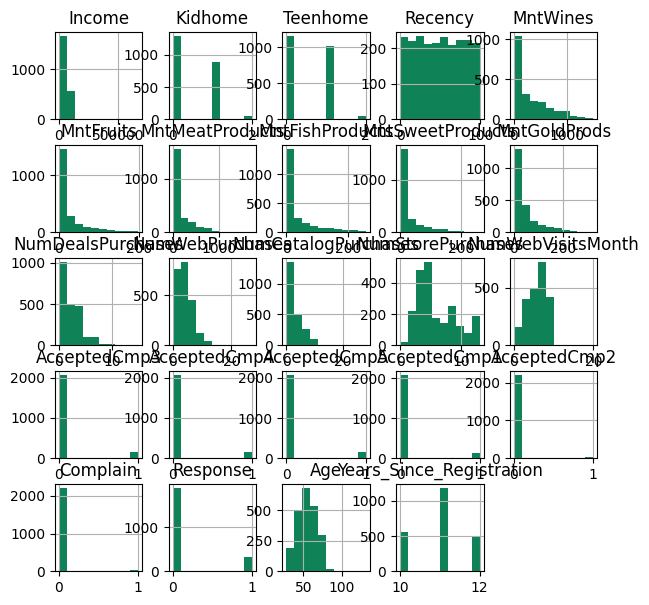

In [14]:
df.hist(figsize=(7,7), color='#0f8357')

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.0,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.0,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.0,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.0,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.0,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.0,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.0,12.0,50.00,259.0
MntSweetProducts,2216.0,27.028881,41.072046,0.0,1.0,8.0,33.00,262.0
MntGoldProds,2216.0,43.965253,51.815414,0.0,9.0,24.5,56.00,321.0


In [16]:
def remove_outliers(data: pd.DataFrame, column: str) -> pd.Series:
    q3, q1 = np.nanpercentile(data[column], [75, 25])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

df = remove_outliers(df, 'Income')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Education                 2208 non-null   object 
 1   Marital_Status            2208 non-null   object 
 2   Income                    2208 non-null   float64
 3   Kidhome                   2208 non-null   int64  
 4   Teenhome                  2208 non-null   int64  
 5   Recency                   2208 non-null   int64  
 6   MntWines                  2208 non-null   int64  
 7   MntFruits                 2208 non-null   int64  
 8   MntMeatProducts           2208 non-null   int64  
 9   MntFishProducts           2208 non-null   int64  
 10  MntSweetProducts          2208 non-null   int64  
 11  MntGoldProds              2208 non-null   int64  
 12  NumDealsPurchases         2208 non-null   int64  
 13  NumWebPurchases           2208 non-null   int64  
 14  NumCatalogPur

## Colum Transform

Podemos obervar que tenemos columnas tipo objeto dentro de nuestro X. Algunas son ordinales (las trataremos por separado) y las categoricas/numércias se tratarán con un pipeline

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

In [19]:
df_ordinal=df["Education"]
df_ordinal = df_ordinal.to_frame()

In [21]:
ordinal_encoder = OrdinalEncoder(categories=[['Basic','Graduation', '2n Cycle','Master','PhD']])
ordinal_encoder.fit(df_ordinal)
serie_encoded= ordinal_encoder.transform(df_ordinal)

ahora nos quedaremos solo con las variables numericas y categoricas de nuestro X. Las variables ordinales se deben tratar por separado y luego unirlas.

In [25]:
df_transformar=df.drop(columns=["Education"])

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn import set_config
set_config(display='diagram')

In [28]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()

imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

In [29]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_selector),
                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7df4de2878b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7df4de287490>)])

In [30]:
col_transformer.fit(df_transformar)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7df4de2878b0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7df4de287490>)])

In [31]:
aux=col_transformer.transform(df_transformar)
df_transformar_procesado=pd.DataFrame(aux,columns=col_transformer.get_feature_names_out())
df_transformar_procesado.info()
df_transformar_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   pipeline-1__Income                    2208 non-null   float64
 1   pipeline-1__Kidhome                   2208 non-null   float64
 2   pipeline-1__Teenhome                  2208 non-null   float64
 3   pipeline-1__Recency                   2208 non-null   float64
 4   pipeline-1__MntWines                  2208 non-null   float64
 5   pipeline-1__MntFruits                 2208 non-null   float64
 6   pipeline-1__MntMeatProducts           2208 non-null   float64
 7   pipeline-1__MntFishProducts           2208 non-null   float64
 8   pipeline-1__MntSweetProducts          2208 non-null   float64
 9   pipeline-1__MntGoldProds              2208 non-null   float64
 10  pipeline-1__NumDealsPurchases         2208 non-null   float64
 11  pipeline-1__NumWe

,pipeline-1__Income,pipeline-1__Kidhome,pipeline-1__Teenhome,pipeline-1__Recency,pipeline-1__MntWines,pipeline-1__MntFruits,pipeline-1__MntMeatProducts,pipeline-1__MntFishProducts,pipeline-1__MntSweetProducts,pipeline-1__MntGoldProds,...,pipeline-1__Age,pipeline-1__Years_Since_Registration,pipeline-2__Marital_Status_Absurd,pipeline-2__Marital_Status_Alone,pipeline-2__Marital_Status_Divorced,pipeline-2__Marital_Status_Married,pipeline-2__Marital_Status_Single,pipeline-2__Marital_Status_Together,pipeline-2__Marital_Status_Widow,pipeline-2__Marital_Status_YOLO
0,0.314089,-0.823235,-0.930428,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,...,0.984809,1.499248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.255431,1.039166,0.907126,-0.380686,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161,...,1.235034,-1.417351,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.964782,-0.823235,-0.930428,-0.795450,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720,...,0.317541,0.040949,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-1.206626,1.039166,-0.930428,-0.795450,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451,...,-1.267219,-1.417351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.321573,1.039166,-0.930428,1.554881,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551,...,-1.016993,-1.417351,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.463060,-0.823235,0.907126,-0.104176,1.193988,0.415851,0.076455,0.077396,2.210723,3.913734,...,0.150724,0.040949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2204,0.597834,2.901566,0.907126,0.241461,0.296050,-0.663644,-0.621422,-0.689014,-0.659786,-0.696581,...,1.902301,-1.417351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2205,0.258218,-0.823235,-0.930428,1.451190,1.783722,0.541373,0.237151,-0.105082,-0.367870,-0.387941,...,-1.016993,-1.417351,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2206,0.850434,-0.823235,0.907126,-1.417597,0.361247,0.089492,0.223377,0.770816,0.070004,0.325790,...,1.068217,-1.417351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


ahora tenemos nuestro df de variable ordinales, categoricas y numericas procesadas.

In [32]:
serie_encoded = pd.Series(serie_encoded.flatten())

In [33]:
X_procesado_final = pd.concat([df_transformar_procesado, serie_encoded,], axis=1)
X_procesado_final

,pipeline-1__Income,pipeline-1__Kidhome,pipeline-1__Teenhome,pipeline-1__Recency,pipeline-1__MntWines,pipeline-1__MntFruits,pipeline-1__MntMeatProducts,pipeline-1__MntFishProducts,pipeline-1__MntSweetProducts,pipeline-1__MntGoldProds,...,pipeline-1__Years_Since_Registration,pipeline-2__Marital_Status_Absurd,pipeline-2__Marital_Status_Alone,pipeline-2__Marital_Status_Divorced,pipeline-2__Marital_Status_Married,pipeline-2__Marital_Status_Single,pipeline-2__Marital_Status_Together,pipeline-2__Marital_Status_Widow,pipeline-2__Marital_Status_YOLO,0
0,0.314089,-0.823235,-0.930428,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,...,1.499248,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.255431,1.039166,0.907126,-0.380686,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161,...,-1.417351,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.964782,-0.823235,-0.930428,-0.795450,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720,...,0.040949,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.206626,1.039166,-0.930428,-0.795450,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451,...,-1.417351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.321573,1.039166,-0.930428,1.554881,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551,...,-1.417351,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,0.463060,-0.823235,0.907126,-0.104176,1.193988,0.415851,0.076455,0.077396,2.210723,3.913734,...,0.040949,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2204,0.597834,2.901566,0.907126,0.241461,0.296050,-0.663644,-0.621422,-0.689014,-0.659786,-0.696581,...,-1.417351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0
2205,0.258218,-0.823235,-0.930428,1.451190,1.783722,0.541373,0.237151,-0.105082,-0.367870,-0.387941,...,-1.417351,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2206,0.850434,-0.823235,0.907126,-1.417597,0.361247,0.089492,0.223377,0.770816,0.070004,0.325790,...,-1.417351,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0


In [35]:
X_procesado_final.shape

(2208, 33)

Luego de cargada nuestra data y procesada, aplicamos método del codo para ver aprox con cuantos grupos debemos entrenar.



In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

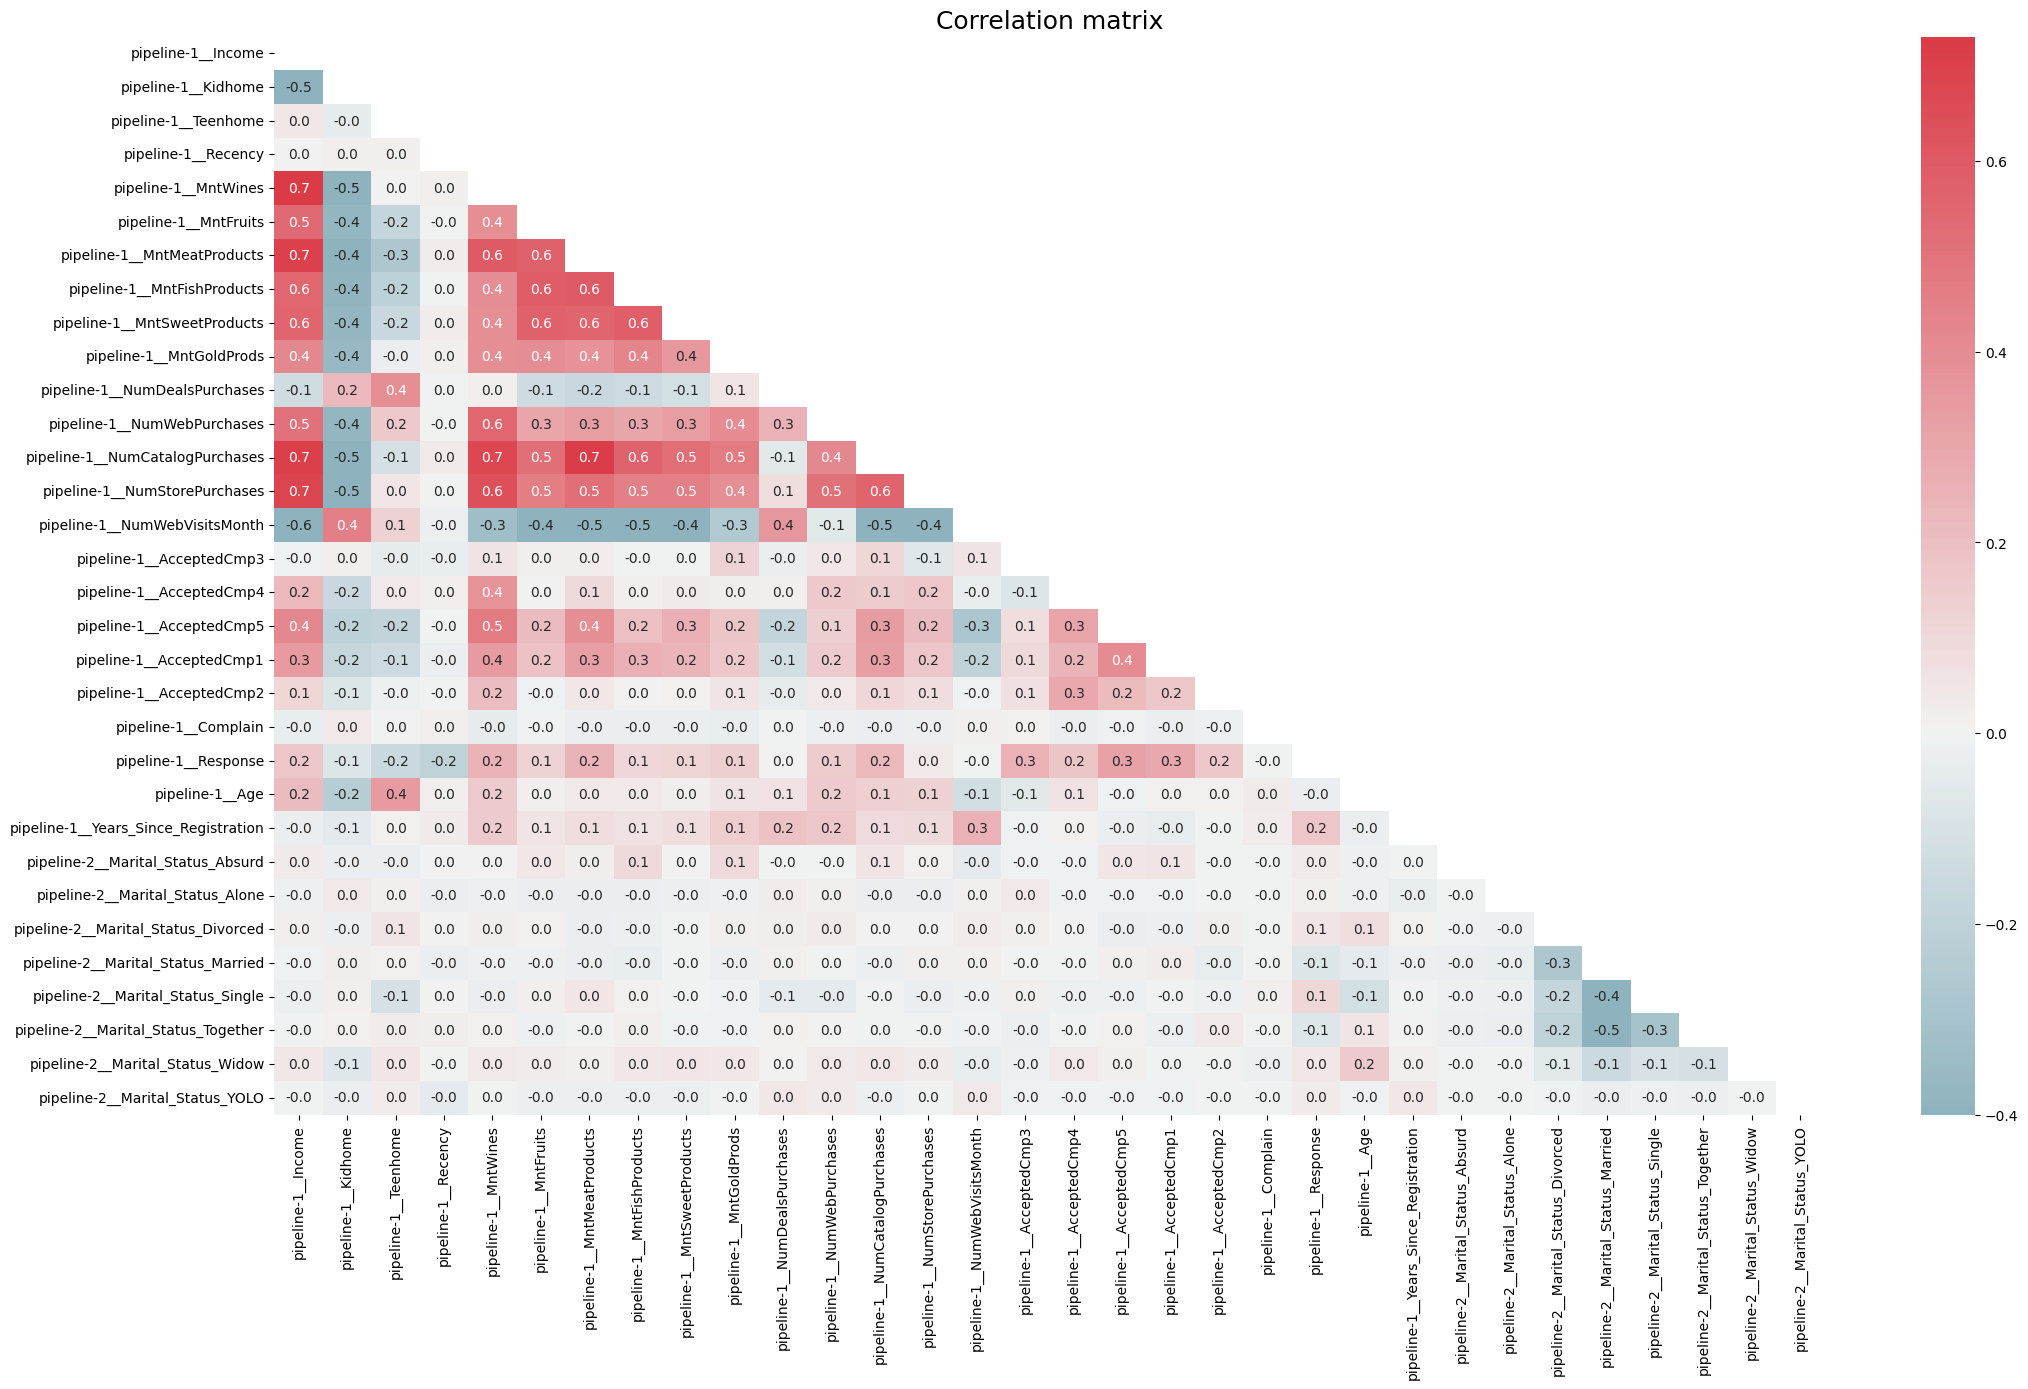

In [38]:
to_corr = ["pipeline-1__Income", "pipeline-1__Kidhome", "pipeline-1__Teenhome", "pipeline-1__Recency", "pipeline-1__MntWines", "pipeline-1__MntFruits", "pipeline-1__MntMeatProducts", "pipeline-1__MntFishProducts", "pipeline-1__MntSweetProducts", "pipeline-1__MntGoldProds", "pipeline-1__NumDealsPurchases", "pipeline-1__NumWebPurchases", "pipeline-1__NumCatalogPurchases", "pipeline-1__NumStorePurchases", "pipeline-1__NumWebVisitsMonth", "pipeline-1__AcceptedCmp3", "pipeline-1__AcceptedCmp4", "pipeline-1__AcceptedCmp5", "pipeline-1__AcceptedCmp1", "pipeline-1__AcceptedCmp2", "pipeline-1__Complain", "pipeline-1__Response", "pipeline-1__Age", "pipeline-1__Years_Since_Registration", "pipeline-2__Marital_Status_Absurd", "pipeline-2__Marital_Status_Alone", "pipeline-2__Marital_Status_Divorced", "pipeline-2__Marital_Status_Married", "pipeline-2__Marital_Status_Single", "pipeline-2__Marital_Status_Together", "pipeline-2__Marital_Status_Widow", "pipeline-2__Marital_Status_YOLO"]

cmap = sns.diverging_palette(220, 10, as_cmap=True)
matrix = np.triu(X_procesado_final[to_corr].corr())
plt.figure(figsize=(25, 14))
plt.title('Correlation matrix', fontsize=18)
sns.heatmap(X_procesado_final[to_corr].corr(), annot=True,
            fmt='.1f', vmin=-0.4, center=0, cmap=cmap, mask=matrix)

plt.show()

**Método del codo para definir el número de cluster para las 2 caracteriticas ante definidas. Price y año de cosntrucción.**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

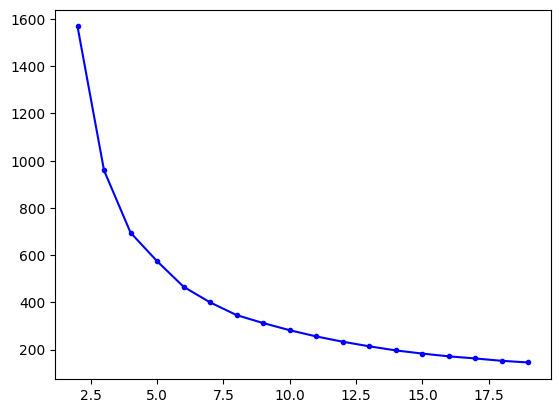

In [57]:
X = X_procesado_final[['pipeline-1__Income', 'pipeline-1__MntWines']]

score = []
k_clusters = range(2,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))

plt.plot(k_clusters, score,'b.-')

Eneste gráfico podemos observar que según el método del codo, el número de clusters donde se nnormaliza, es decir no hay cambios significativos dado que la pendiente no es tan empinada es en el 6. Procedemos a entrenar el modelo con el número de codos elegido y luego aplicaremos la métrica de siluette score para temrinar de definir.

**Entrenamiento**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


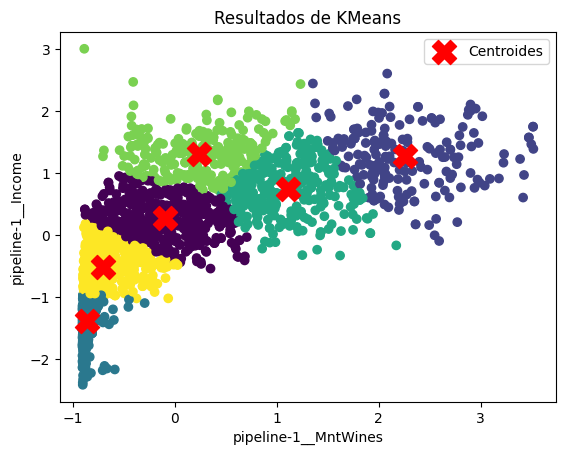

In [47]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = X_procesado_final[['pipeline-1__Income', 'pipeline-1__MntWines']]
y = X_procesado_final['pipeline-1__Income']

k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X.iloc[:, 1], X.iloc[:, 0], c=y_pred, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='X', label='Centroides')

plt.xlabel('pipeline-1__MntWines')
plt.ylabel('pipeline-1__Income')
plt.title('Resultados de KMeans')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

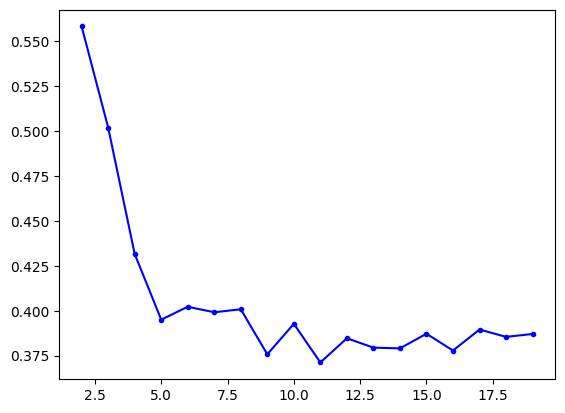

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

score = []
k_clusters = range(2,20)
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(silhouette_score(X, kmeans.labels_))
plt.plot(k_clusters, score,'b.-')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


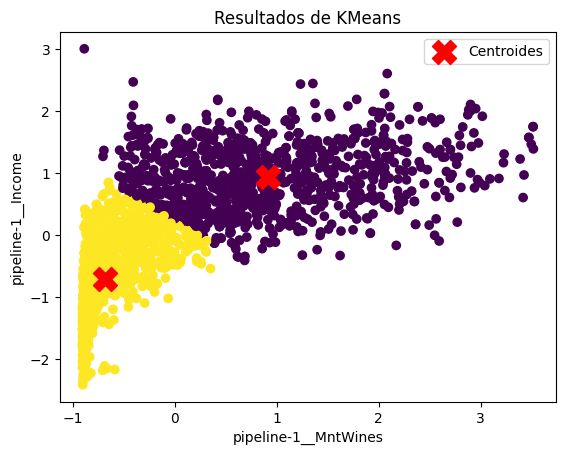

In [60]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = X_procesado_final[['pipeline-1__Income', 'pipeline-1__MntWines']]
y = X_procesado_final['pipeline-1__Income']

k = 2
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X.iloc[:, 1], X.iloc[:, 0], c=y_pred, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s=300, c='red', marker='X', label='Centroides')

plt.xlabel('pipeline-1__MntWines')
plt.ylabel('pipeline-1__Income')
plt.title('Resultados de KMeans')
plt.legend()
plt.show()

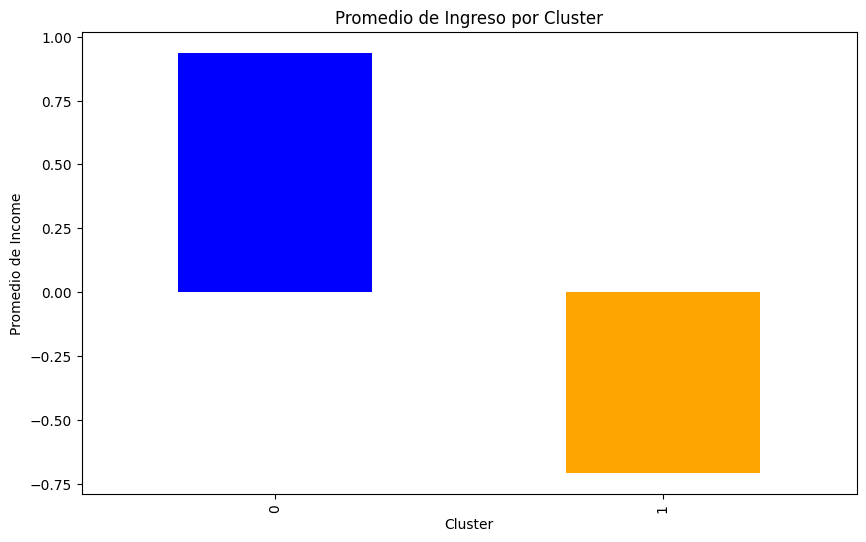

In [65]:
X_procesado_final['Cluster'] = y_pred

cluster_promedio = X_procesado_final.groupby('Cluster')['pipeline-1__Income'].mean()

plt.figure(figsize=(10, 6))
cluster_promedio.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Promedio de Income')
plt.title('Promedio de Ingreso por Cluster')
plt.show()

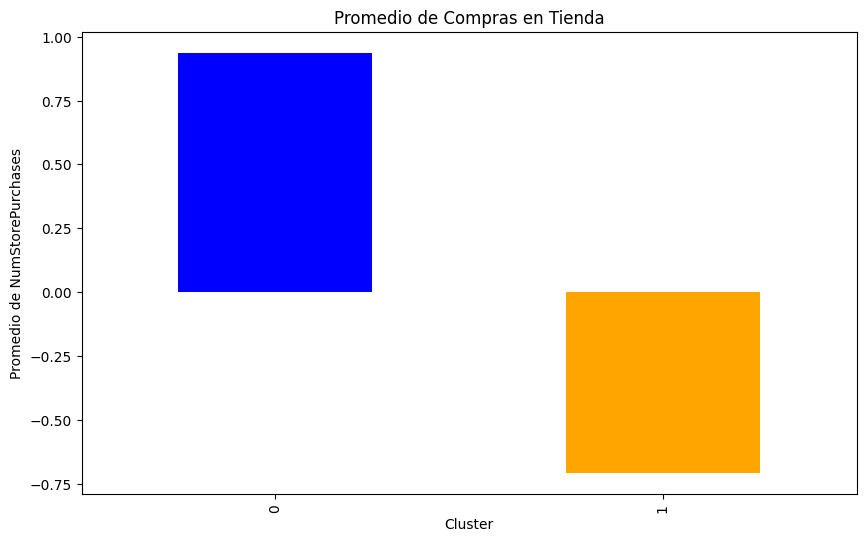

In [67]:
cluster_promedio_años = X_procesado_final.groupby('Cluster')['pipeline-1__NumStorePurchases'].mean()

plt.figure(figsize=(10, 6))
cluster_promedio.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Cluster')
plt.ylabel('Promedio de NumStorePurchases')
plt.title('Promedio de Compras en Tienda')
plt.show()